In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from datetime import date  

In [9]:
import Wind_util
import BrownianMotion
import Eval_util
import logger_util
logger = logger_util.setup_logger('investment_research')

In [99]:
price_data = Wind_util.get_hfq_price(['000300.SH','CBA00301.CS'],'2015-01-01','2025-10-21')
ret_data = price_data.pct_change()

在过去的10年中，债券凭借其较低的波动率和相对于货币基金投资更高的收益率，从而成为券商和公募投资部门的主要投资对象。经典的80%债券20%权益或者90%债券10%权益的组合，被广泛应用于券商和公募基金的投资组合中。但伴随着2024年债券收益率的不但下探，如今中国债券已经进入了低利率时代，债券相较于权益极低的收益率使其难以满足投资者的需求，但是权益类产品较高的波动率又使得投资者望而却步。如何稳定的获取目标收益率已成为了当下各投资机构的研究重点。

# 2024年以及之前

In [100]:
equity_performance = Eval_util.Year_analysis(ret_data['000300.SH'],save_=False).iloc[:,:6]
fixincome_performance = Eval_util.Year_analysis(ret_data['CBA00301.CS'],save_=False).iloc[:,:6]

数据读取成功，共2623行数据
列名: ['000300.SH']

前5行数据:
            000300.SH
2015-01-05        NaN
2015-01-06  -0.000132
2015-01-07   0.000750
2015-01-08  -0.023199
2015-01-09  -0.003522

数据清洗后，共2622行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2015 年...
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2015   0.0246     -0.4348    -0.1691       0.3939     0.0624     0.0565    
       NaN          NaN            

20

In [101]:
print(equity_performance)
print(fixincome_performance)
'''
可以观察到固收的波动率远低于权益产品，在过去十年中，除了2017年，剩余年份固收均为正收益。
'''

      年度   区间收益率   年化波动率    最大回撤    夏普比率    卡玛比率
0   2015  0.0246  0.3939 -0.4348  0.0624  0.0565
1   2016 -0.1128  0.2222 -0.1938 -0.5076 -0.5821
2   2017  0.2178  0.1015 -0.0607  2.1461  3.5888
3   2018 -0.2531  0.2142 -0.3188 -1.1814 -0.7940
4   2019  0.3607  0.1985 -0.1349  1.8168  2.6735
5   2020  0.2721  0.2277 -0.1608  1.1950  1.6923
6   2021 -0.0520  0.1859 -0.1819 -0.2797 -0.2858
7   2022 -0.2163  0.2041 -0.2865 -1.0601 -0.7550
8   2023 -0.1138  0.1350 -0.2151 -0.8428 -0.5289
9   2024  0.1468  0.2139 -0.1441  0.6866  1.0193
10  2025  0.1710  0.1575 -0.1049  1.0861  1.6301
      年度   区间收益率   年化波动率    最大回撤    夏普比率    卡玛比率
0   2015  0.0794  0.0181 -0.0178  4.3938  4.4510
1   2016  0.0128  0.0195 -0.0421  0.6564  0.3043
2   2017 -0.0120  0.0143 -0.0196 -0.8433 -0.6157
3   2018  0.0961  0.0174 -0.0110  5.5079  8.7168
4   2019  0.0441  0.0136 -0.0126  3.2561  3.5085
5   2020  0.0307  0.0243 -0.0390  1.2646  0.7877
6   2021  0.0569  0.0125 -0.0066  4.5447  8.5816
7   2022  0.0335  0.

'\n可以观察到固收的波动率远低于权益产品，在过去十年中，除了2017年，剩余年份固收均为正收益。\n'

In [103]:
'''
考虑简单的持有策略：80%，20%的组合以及90%，10%的组合
'''
st8020_t = ret_data['000300.SH']*0.2 + ret_data['CBA00301.CS']*0.8
st9010_t = ret_data['000300.SH']*0.1 + ret_data['CBA00301.CS']*0.9


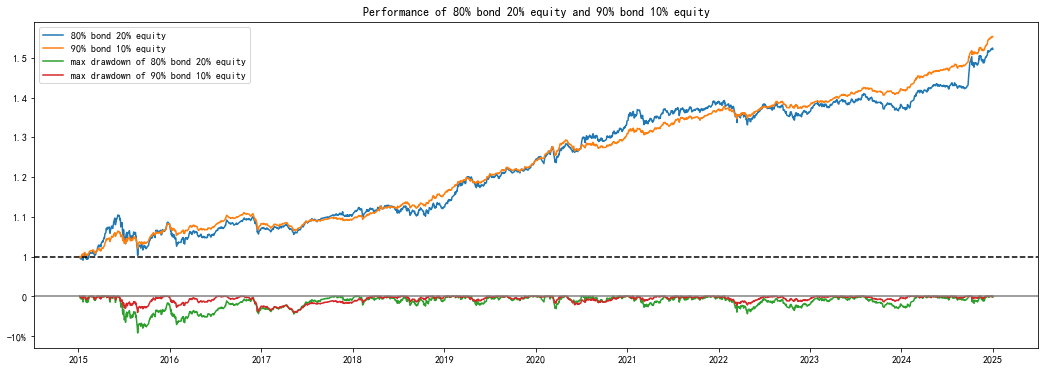

In [104]:
#pv
st8020 = st8020_t.loc[:'2024-12-31']
st9010 = st9010_t.loc[:'2024-12-31']
pv8020 = (1+st8020).cumprod()
pv9010 = (1+st9010).cumprod()

plt.figure(figsize=(18,6))
plt.plot(pv8020,label='80% bond 20% equity')
plt.plot(pv9010,label='90% bond 10% equity')
plt.axhline(y=1, xmin=0, xmax=2025, color='black', linestyle='--')
plt.plot(max_draw(pv8020)+0.9,label='max drawdown of 80% bond 20% equity')
plt.plot(max_draw(pv9010)+0.9,label='max drawdown of 90% bond 10% equity')
plt.axhline(y=0.9, xmin=0, xmax=2025, color='grey', linestyle='-')
plt.yticks([0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],['-10%',0,1,1.1,1.2,1.3,1.4,1.5])
plt.legend()
plt.title('Performance of 80% bond 20% equity and 90% bond 10% equity')
plt.show()

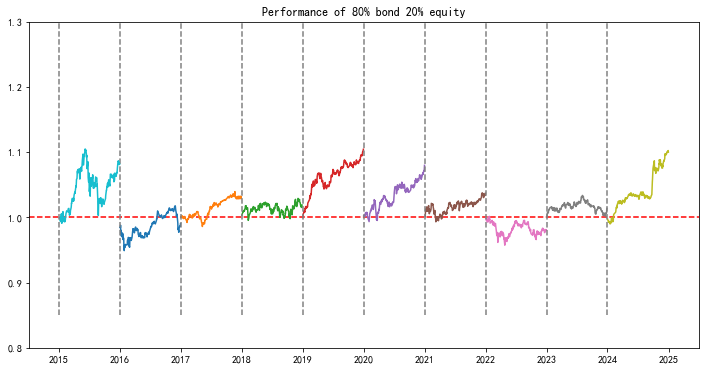

In [ ]:
year_pv8020 = (1+st8020).groupby(ret_data.index.year).cumprod()
year_pv9010 = (1+st9010).groupby(ret_data.index.year).cumprod()

plt.figure(figsize=(12,6))
plt.axhline(y=1, xmin=0, xmax=2025, color='r', linestyle='--')
plt.ylim(0.8, 1.3)
for i in list(set(year_pv8020.index.year)):
    plt.plot(year_pv8020[year_pv8020.index.year==i])
    plt.axvline(x=date(year=i, month=1, day=1), ymin=0.1, ymax=1.3, color='grey', linestyle='--')
plt.title('Performance of 80% bond 20% equity')
plt.show()

In [79]:
pv_rolling = pd.DataFrame()
for i in range(len(st8020)-250):
    sub_pv = (1+st8020[i:i+250]).cumprod().reset_index(drop=True)
    pv_rolling = pd.concat([pv_rolling,sub_pv],axis=1)


2015-01-05         NaN
2015-01-06   -0.000208
2015-01-07    0.000465
2015-01-08   -0.004661
2015-01-09   -0.000689
                ...   
2016-01-05   -0.000667
2016-01-06    0.004100
2016-01-07   -0.012833
2016-01-08    0.005108
2016-01-11   -0.009173
Length: 250, dtype: float64

In [83]:
pv_rolling.fillna(1,inplace=True)

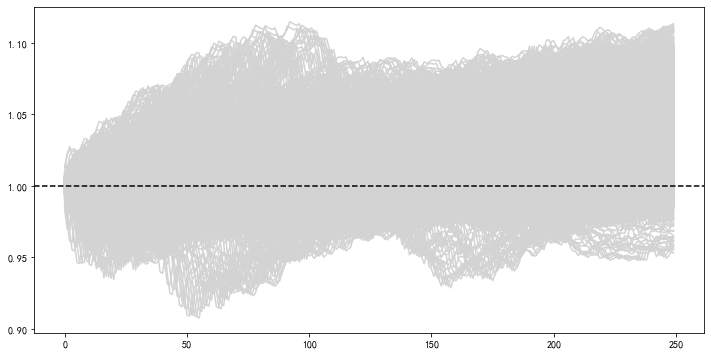

In [106]:
plt.figure(figsize=(12,6))
plt.plot(pv_rolling,color='lightgrey')
plt.axhline(1,color='k',linestyle='--')


In [95]:
ret_oneyear = (pv_rolling.iloc[-1,:]-1)

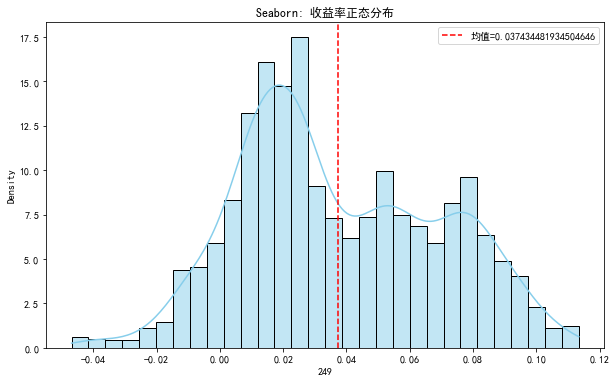

In [98]:
import seaborn as sns  

plt.figure(figsize=(10, 6))  
sns.histplot(ret_oneyear, kde=True, bins=30, stat='density', color='skyblue')  
plt.axvline(ret_oneyear.mean(), color='red', linestyle='--', label=f'均值={ret_oneyear.mean()}')  
plt.title('Seaborn: 收益率正态分布')  
plt.legend()  
plt.show()

# 2025年以及之后

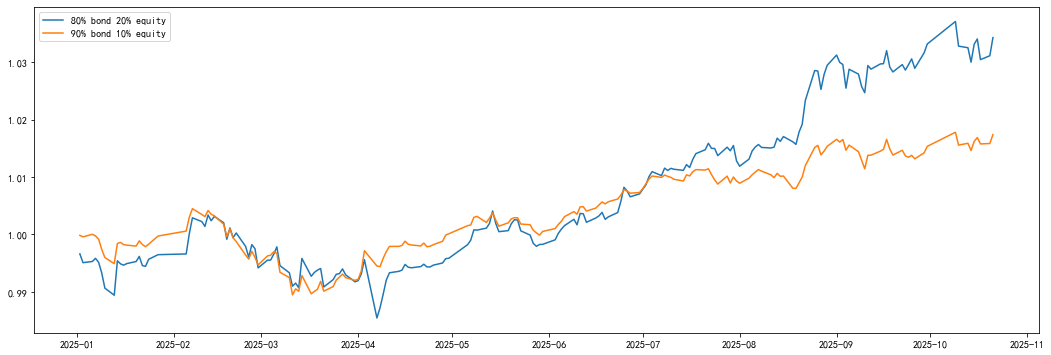

In [105]:
st8020_f = st8020_t.loc['2025-01-01':]
st9010_f = st9010_t.loc['2025-01-01':]
pv8020_f = (1+st8020_f).cumprod()
pv9010_f = (1+st9010_f).cumprod()

plt.figure(figsize=(18,6))
plt.plot(pv8020_f,label='80% bond 20% equity')
plt.plot(pv9010_f,label='90% bond 10% equity')
plt.legend()
plt.show()


In [ ]:
'''
对比2017年与2024年利率中枢
蒙卡模拟日本低利率时代
模拟之后的收益率情况
'''